In [1]:
#Sohail Abrar Shaik
#Jeswanth Naidu Padi

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


df = pd.read_csv("diabetes_prediction_dataset.csv")#loading the dataset

#preprocessing1: Normalizing the column
df['smoking_history'] = df['smoking_history'].str.lower().str.strip()

print("\nUnique values in 'smoking_history' before encoding:")
print(df['smoking_history'].unique())

#preprocessing2:applying encoding
df['smoking_history'] = df['smoking_history'].replace({'no info': 0,'never': 0,'former': 1,  'not current': 1, 'ever': 1, 'current': 1})

print("\nUnique values in 'smoking_history' after encoding:")
print(df['smoking_history'].unique())

missing_values = df.isnull().sum()

# preprocessing3: Print missing value counts for each column
print("Missing values in each column:")
print(missing_values)



# Splitting the dataset into males and females
dfm = df[df['gender'] == 'Male']
dff = df[df['gender'] == 'Female']

# Saving transformed data
dfm.to_csv("males_data_fixed.csv", index=False)
dff.to_csv("females_data_fixed.csv", index=False)





Unique values in 'smoking_history' before encoding:
['never' 'no info' 'current' 'former' 'ever' 'not current']

Unique values in 'smoking_history' after encoding:
[0 1]
Missing values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


C:\Users\sohai\AppData\Local\Temp\ipykernel_4516\1461254573.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoking_history'] = df['smoking_history'].replace({'no info': 0,'never': 0,'former': 1,  'not current': 1, 'ever': 1, 'current': 1})


In [3]:
# Checking the class imbalance in 'diabetes' column for male dataset[dfm]

print("\nClass distribution in 'diabetes' column (before SMOTE) in maled dataset:")
print(dfm['diabetes'].value_counts())

# Separating features (X) and target (y), dropping 'gender' from X
X = dfm.drop(columns=['diabetes', 'gender'])  # Dropping  'diabetes' (target) and 'gender'
y = dfm['diabetes']                          # Targeting column

# Performing train-test split before SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fitting and transforming training data
X_test_scaled = scaler.transform(X_test)        # Transforming test data only

# Applying SMOTE to training data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)


# Checking  the class distribution after SMOTE
print("\nClass distribution in 'diabetes' column (after SMOTE) in male dataset:")
print(pd.Series(y_smote).value_counts())






Class distribution in 'diabetes' column (before SMOTE) in maled dataset:
diabetes
0    37391
1     4039
Name: count, dtype: int64

Class distribution in 'diabetes' column (after SMOTE) in male dataset:
diabetes
0    26174
1    26174
Name: count, dtype: int64


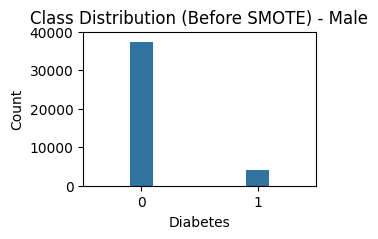

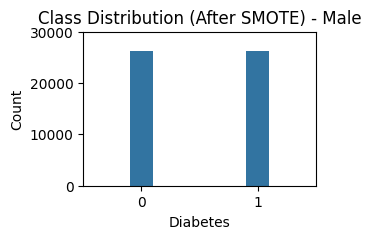

In [5]:
#Bar plot for before and after smote

# Data for 'diabetes' column (Before and After SMOTE) for Male
data_before_smote = {'Diabetes': ['0', '1'], 'Count': [37391, 4039]}
data_after_smote = {'Diabetes': ['0', '1'], 'Count': [26174, 26174]}  # After SMOTE balancing

# Convert to DataFrame
df_before_smote = pd.DataFrame(data_before_smote)
df_after_smote = pd.DataFrame(data_after_smote)

# Create very small plots with reduced bar size
plt.figure(figsize=(3, 2))

# Plot for Before SMOTE
sns.barplot(x='Diabetes', y='Count', data=df_before_smote, width=0.2)
plt.title('Class Distribution (Before SMOTE) - Male')
plt.ylim(0, 40000)  # Set y-axis limit for clear visualization of counts
plt.show()

# Create even smaller plot for After SMOTE
plt.figure(figsize=(3, 2))
sns.barplot(x='Diabetes', y='Count', data=df_after_smote, width=0.2)
plt.title('Class Distribution (After SMOTE) - Male')
plt.ylim(0, 30000)  # Set y-axis limit for clear visualization of counts
plt.show()


In [6]:
#Applying algorithms on dataset on male dataset

# Step 3: Random Forest Grid Search
rf_param_grid = {'n_estimators': [50, 100, 150, 250]} #exploring hyper parameters for random forest
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='accuracy')#using grid search to find best parameter 
rf_grid.fit(X_smote, y_smote)
print("\nBest Random Forest parameters:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 4: AdaBoost Classifier Grid Search
adaboost_param_grid = {'n_estimators': [50, 100, 150 ,250]}#exploring adaboost hyperparameter for Adaboost Classifiere
adaboost = AdaBoostClassifier(random_state=42)
adaboost_grid = GridSearchCV(estimator=adaboost, param_grid=adaboost_param_grid, cv=3, scoring='accuracy') #using grid search to find best parameter
adaboost_grid.fit(X_smote, y_smote)
print("\nBest AdaBoost parameters:", adaboost_grid.best_params_)
adaboost_best = adaboost_grid.best_estimator_
y_pred_adaboost = adaboost_best.predict(X_test_scaled)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print(classification_report(y_test, y_pred_adaboost))

# Step 5: SVM Grid Search
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}#exploring hyper parameter for Support Vector Machine
svm = SVC(random_state=42)
svm_grid = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=3, scoring='accuracy')#Using grid search cv to find the best parameter 
svm_grid.fit(X_smote, y_smote)
print("\nBest SVM parameters:", svm_grid.best_params_)
svm_best = svm_grid.best_estimator_
y_pred_svm = svm_best.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



Best Random Forest parameters: {'n_estimators': 250}
Random Forest Accuracy: 0.9529326574945691
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     11217
           1       0.77      0.73      0.75      1212

    accuracy                           0.95     12429
   macro avg       0.87      0.86      0.86     12429
weighted avg       0.95      0.95      0.95     12429


Best AdaBoost parameters: {'n_estimators': 250}
AdaBoost Accuracy: 0.9246117949955749
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     11217
           1       0.58      0.85      0.69      1212

    accuracy                           0.92     12429
   macro avg       0.78      0.89      0.82     12429
weighted avg       0.94      0.92      0.93     12429


Best SVM parameters: {'C': 10, 'kernel': 'rbf'}
SVM Accuracy: 0.8792340494005954
              precision    recall  f1-score   support

           0       0.99  


Random Forest Confusion Matrix:
[[10954   263]
 [  322   890]]

AdaBoost Confusion Matrix:
[[10460   757]
 [  180  1032]]

SVM Confusion Matrix:
[[9802 1415]
 [  86 1126]]


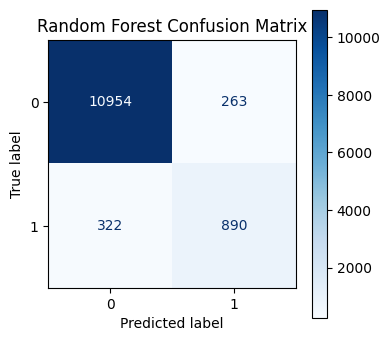

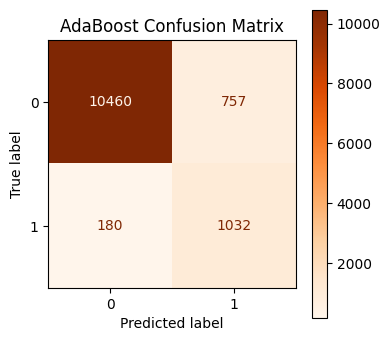

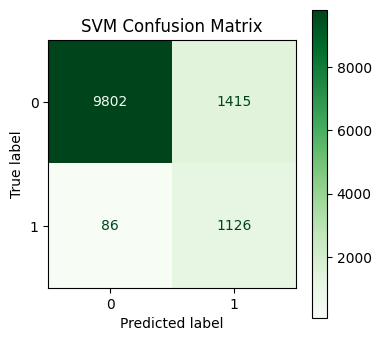

In [7]:
# Confusion matrix for algorithms applie on male dataset

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:")
print(cm_rf)
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the size (width, height)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_best.classes_)
disp_rf.plot(cmap='Blues', ax=ax)
ax.set_title("Random Forest Confusion Matrix")

# AdaBoost Confusion Matrix
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
print("\nAdaBoost Confusion Matrix:")
print(cm_adaboost)
fig, ax = plt.subplots(figsize=(4, 4))
disp_adaboost = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost, display_labels=adaboost_best.classes_)
disp_adaboost.plot(cmap='Oranges', values_format='d', ax=ax)
ax.set_title("AdaBoost Confusion Matrix")

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nSVM Confusion Matrix:")
print(cm_svm)
fig, ax = plt.subplots(figsize=(4, 4))
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_best.classes_)
disp_svm.plot(cmap='Greens', ax=ax)
ax.set_title("SVM Confusion Matrix")

plt.show()


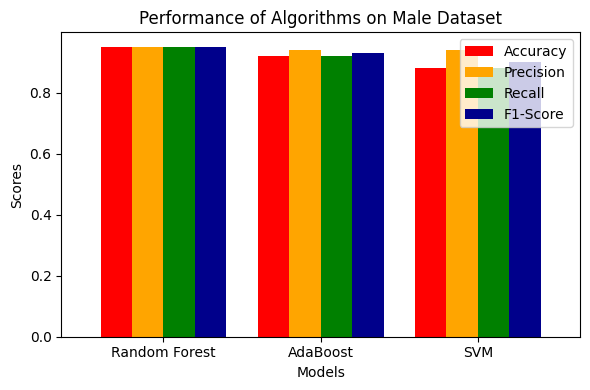

In [8]:
#Comparing Accuracy,Precision,Recall and F1 score of algorithms applied on male dataset

# Data for the plot
data = {
    'Model': ['Random Forest', 'AdaBoost', 'SVM'],
    'Accuracy': [0.95, 0.92, 0.88],
    'Precision': [0.95, 0.94, 0.94],
    'Recall': [0.95, 0.92, 0.88],
    'F1-Score': [0.95, 0.93, 0.90]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Set the plot size
plt.figure(figsize=(6, 4))

# Plotting the data with seaborn
df.set_index('Model').plot(kind='bar', width=0.8, color=['red', 'orange', 'green', 'darkblue'], ax=plt.gca())

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance of Algorithms on Male Dataset')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [9]:
# Checking class distribution in 'diabetes' for female dataset(dff)

print("\nClass distribution in 'diabetes' column (before SMOTE) for female dataset:")
print(dff['diabetes'].value_counts())

# Separating features (X) and target (y), dropping 'gender' from X
X_dff = dff.drop(columns=['diabetes', 'gender'])  # Dropping 'diabetes' (target) and 'gender'
y_dff = dff['diabetes']                          # Targetting column

#Performing train-test split
X_train_dff, X_test_dff, y_train_dff, y_test_dff = train_test_split( X_dff, y_dff, test_size=0.3, random_state=42, stratify=y_dff)

# Standardizing the training and test data
scaler = StandardScaler()
X_train_scaled_f = scaler.fit_transform(X_train_dff)  # Fit and transform training data
X_test_scaled_f = scaler.transform(X_test_dff)        # Transform test data only

#Applying SMOTE to training data
smote = SMOTE(random_state=42)
X_smote_dff, y_smote_dff = smote.fit_resample(X_train_scaled_f, y_train_dff)

# Step 5: Check class distribution after SMOTE
print("\nClass distribution in 'diabetes' column (after SMOTE) for female dataset:")
print(pd.Series(y_smote_dff).value_counts())



Class distribution in 'diabetes' column (before SMOTE) for female dataset:
diabetes
0    54091
1     4461
Name: count, dtype: int64

Class distribution in 'diabetes' column (after SMOTE) for female dataset:
diabetes
0    37863
1    37863
Name: count, dtype: int64


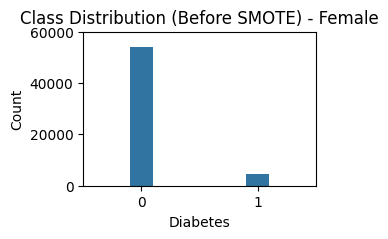

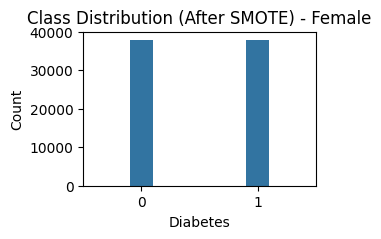

In [10]:
#Bar plot for female dataset before and after applying  the smote

# Data for 'diabetes' column (Before and After SMOTE) for Female (dff)
data_before_smote_female = {'Diabetes': ['0', '1'], 'Count': [54091, 4461]}
data_after_smote_female = {'Diabetes': ['0', '1'], 'Count': [37863, 37863]}  # After SMOTE balancing

# Convert to DataFrame
df_before_smote_female = pd.DataFrame(data_before_smote_female)
df_after_smote_female = pd.DataFrame(data_after_smote_female)

# Create very small plots with reduced bar size
plt.figure(figsize=(3, 2))

# Plot for Before SMOTE (Female)
sns.barplot(x='Diabetes', y='Count', data=df_before_smote_female, width=0.2)
plt.title('Class Distribution (Before SMOTE) - Female')
plt.ylim(0, 60000)  # Set y-axis limit for clear visualization of counts
plt.show()

# Create even smaller plot for After SMOTE (Female)
plt.figure(figsize=(3, 2))
sns.barplot(x='Diabetes', y='Count', data=df_after_smote_female, width=0.2)
plt.title('Class Distribution (After SMOTE) - Female')
plt.ylim(0, 40000)  # Set y-axis limit for clear visualization of counts
plt.show()


In [11]:
#Algorithm on dff[female dataset]

# Step 6: Random Forest Grid Search
rf_param_grid = {'n_estimators': [50, 100, 150,250]}#Exploring hyperparameters for random forest
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='accuracy')#Using grid search to find the best parameter
rf_grid.fit(X_smote_dff, y_smote_dff)  # SMOTE applied to scaled training data
print("\nBest Random Forest parameters for dff:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_
y_pred_rf_dff = rf_best.predict(X_test_scaled_f)  # Use scaled test data for predictions
print("Random Forest Accuracy for dff:", accuracy_score(y_test_dff, y_pred_rf_dff))
print(classification_report(y_test_dff, y_pred_rf_dff))

# Step 7: AdaBoost Classifier Grid Search
adaboost_param_grid = {'n_estimators': [50, 100, 150,250]} #Exploring hyperparameters for Adaboost classifier
adaboost = AdaBoostClassifier(random_state=42)
adaboost_grid = GridSearchCV(estimator=adaboost, param_grid=adaboost_param_grid, cv=3, scoring='accuracy') #Using grid search to find the best parameter
adaboost_grid.fit(X_smote_dff, y_smote_dff)  # SMOTE applied to scaled training data
print("\nBest AdaBoost parameters for dff:", adaboost_grid.best_params_)
adaboost_best = adaboost_grid.best_estimator_
y_pred_adaboost_dff = adaboost_best.predict(X_test_scaled_f)  # Use scaled test data for predictions
print("AdaBoost  Accuracy for dff:", accuracy_score(y_test_dff, y_pred_adaboost_dff))
print(classification_report(y_test_dff, y_pred_adaboost_dff))

# Step 8: SVM Grid Search
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']} #Exploring hyperparameter for Support Vector machine
svm = SVC(random_state=42)
svm_grid = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=3, scoring='accuracy')#Using grid search to find the best parameter 
svm_grid.fit(X_smote_dff, y_smote_dff)  # SMOTE applied to scaled training data
print("\nBest SVM parameters for dff:", svm_grid.best_params_)
svm_best = svm_grid.best_estimator_
y_pred_svm_dff = svm_best.predict(X_test_scaled_f)  # Use scaled test data for predictions
print("SVM  Accuracy for dff:", accuracy_score(y_test_dff, y_pred_svm_dff))
print(classification_report(y_test_dff, y_pred_svm_dff))



Best Random Forest parameters for dff: {'n_estimators': 150}
Random Forest Accuracy for dff: 0.9645906865535694
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16228
           1       0.78      0.75      0.76      1338

    accuracy                           0.96     17566
   macro avg       0.88      0.87      0.87     17566
weighted avg       0.96      0.96      0.96     17566


Best AdaBoost parameters for dff: {'n_estimators': 250}
AdaBoost  Accuracy for dff: 0.9447227598770351
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     16228
           1       0.60      0.82      0.69      1338

    accuracy                           0.94     17566
   macro avg       0.79      0.89      0.83     17566
weighted avg       0.96      0.94      0.95     17566


Best SVM parameters for dff: {'C': 10, 'kernel': 'rbf'}
SVM  Accuracy for dff: 0.8937720596607082
              precision    rec


Random Forest Confusion Matrix (DFF):
[[15937   291]
 [  331  1007]]

AdaBoost Confusion Matrix (DFF):
[[15504   724]
 [  247  1091]]

SVM Confusion Matrix (DFF):
[[14478  1750]
 [  116  1222]]


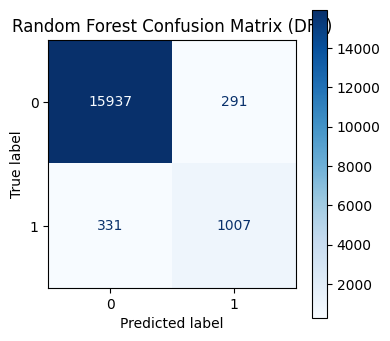

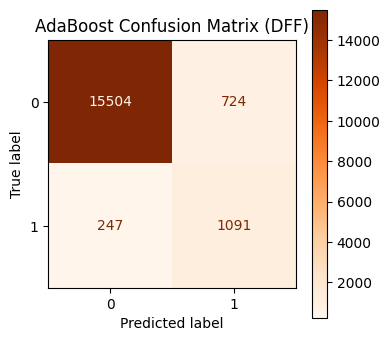

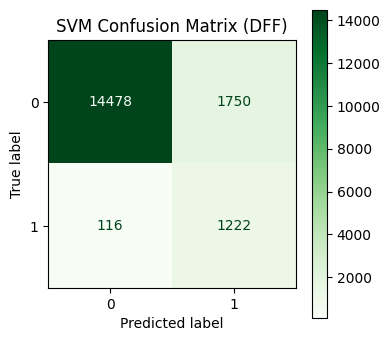

In [12]:
#Confusion matrix of algorithms applied on female dataset 

# Random Forest Confusion Matrix for DFF
cm_rf_dff = confusion_matrix(y_test_dff, y_pred_rf_dff)
print("\nRandom Forest Confusion Matrix (DFF):")
print(cm_rf_dff)
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the size (width, height)
disp_rf_dff = ConfusionMatrixDisplay(confusion_matrix=cm_rf_dff, display_labels=rf_best.classes_)
disp_rf_dff.plot(cmap='Blues', ax=ax)
ax.set_title("Random Forest Confusion Matrix (DFF)")

# AdaBoost Confusion Matrix for DFF
cm_adaboost_dff = confusion_matrix(y_test_dff, y_pred_adaboost_dff)
print("\nAdaBoost Confusion Matrix (DFF):")
print(cm_adaboost_dff)
fig, ax = plt.subplots(figsize=(4, 4))
disp_adaboost_dff = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost_dff, display_labels=adaboost_best.classes_)
disp_adaboost_dff.plot(cmap='Oranges', values_format='d', ax=ax)
ax.set_title("AdaBoost Confusion Matrix (DFF)")

# SVM Confusion Matrix for DFF
cm_svm_dff = confusion_matrix(y_test_dff, y_pred_svm_dff)
print("\nSVM Confusion Matrix (DFF):")
print(cm_svm_dff)
fig, ax = plt.subplots(figsize=(4, 4))
disp_svm_dff = ConfusionMatrixDisplay(confusion_matrix=cm_svm_dff, display_labels=svm_best.classes_)
disp_svm_dff.plot(cmap='Greens', ax=ax)
ax.set_title("SVM Confusion Matrix (DFF)")

plt.show()


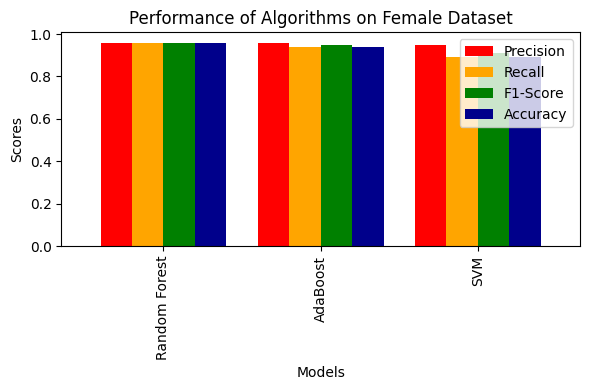

In [13]:
#Comparing Accuracy, Precision,Recall and F1 score of algorithms applied on Female dataset

# Data for the plot (Female Dataset)
data_female = {
    'Model': ['Random Forest', 'AdaBoost', 'SVM'],
    'Precision': [0.96, 0.96, 0.95],
    'Recall': [0.96, 0.94, 0.89],
    'F1-Score': [0.96, 0.95, 0.91],
    'Accuracy': [0.96, 0.94, 0.89]  
}

# Convert the data into a DataFrame
df_female = pd.DataFrame(data_female)

# Set the plot size
plt.figure(figsize=(6, 4))

# Plotting the data with seaborn
df_female.set_index('Model').plot(kind='bar', width=0.8, color=['red', 'orange', 'green', 'darkblue'], ax=plt.gca())

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance of Algorithms on Female Dataset')

# Show the plot
plt.tight_layout()
plt.show()
